<a href="https://colab.research.google.com/github/gp201/Skipgram/blob/master/skipgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
pip install smart_open

In [126]:
from gensim.models import Word2Vec
from smart_open import open
import os

import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from matplotlib import pyplot

import numpy as np 
import string 
import nltk
# from nltk.corpus import stopwords
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [0]:
def preprocessing(corpus): 
    stop_words = set(stopwords.words('english'))     
    training_data = [] 
    sentences = corpus.split(".") 
    for i in range(len(sentences)): 
        sentences[i] = sentences[i].strip() 
        sentence = sentences[i].split() 
        x = [word.strip(string.punctuation) for word in sentence 
                                     if word not in stop_words] 
        x = [word.lower() for word in x] 
        training_data.append(x) 
    return training_data 

In [0]:
sentences = preprocessing("Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been included, all of them carrying two CFTR defects: 103 developed at least 1 pulmonary infection with Pa, and 68 patients of them had CPA. DCTN4 variants were identified in 24% (29/121) CF patients with Pa infection and in only 17% (3/18) CF patients with no Pa infection. Of the patients with CPA, 29% (20/68) had DCTN4 missense variants vs 23% (8/35) in patients without CPA. Interestingly, p.Tyr263Cys tend to be more frequently observed in CF patients with CPA than in patients without CPA (4/68 vs 0/35), and DCTN4 missense variants tend to be more frequent in male CF patients with CPA bearing two class II mutations than in male CF patients without CPA bearing two class II mutations (P = 0.06). Our observations reinforce that DCTN4 missense variants, especially p.Tyr263Cys, may be involved in the pathogenesis of CPA in male CF.")

In [0]:
# train model
# model = Word2Vec(corpus_file="corpus_pubtator.txt", min_count=1, size=256)
model = Word2Vec(sentences, min_count=1, size=256, sg=1)

In [130]:
# summarize the loaded model
print(model)

Word2Vec(vocab=115, size=256, alpha=0.025)


In [131]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['pseudomonas', 'aeruginosa', 'pa', 'infection', 'cystic', 'fibrosis', 'cf', 'patients', 'associated', 'worse', 'long-term', 'pulmonary', 'disease', 'shorter', 'survival', 'chronic', 'cpa', 'reduced', 'lung', 'function', 'faster', 'rate', 'decline', 'increased', 'rates', 'exacerbations', 'by', 'using', 'exome', 'sequencing', 'extreme', 'phenotype', 'design', 'recently', 'shown', 'isoforms', 'dynactin', '4', 'dctn4', 'may', 'influence', 'leading', 'respiratory', 'the', 'purpose', 'study', 'investigate', 'role', 'missense', 'variants', 'incidence', 'age', 'first', 'cohort', 'adult', 'single', 'centre', 'polymerase', 'chain', 'reaction', 'direct', 'used', 'screen', 'dna', 'samples', 'a', 'total', '121', 'cochin', 'hospital', 'included', 'carrying', 'two', 'cftr', 'defects', '103', 'developed', 'least', '1', '68', 'identified', '24', '29/121', '17', '3/18', 'of', '29', '20/68', 'vs', '23', '8/35', 'without', 'interestingly', 'p', 'tyr263cys', 'tend', 'frequently', 'observed', '4/68', '0/35

In [135]:
# access vector for one word
print(model['male'])

[ 1.9253263e-03 -1.1900460e-04 -6.8949925e-04 -2.5623050e-04
 -5.5235071e-04 -1.5257086e-03 -1.3670705e-03  1.5441400e-03
  6.3042663e-04 -1.7073053e-03 -4.8008774e-04  1.1430803e-03
  2.2248389e-05 -5.3068640e-04  9.7714528e-04  1.8201683e-03
 -9.0480153e-04  8.2634611e-04  8.8219793e-04 -9.4898758e-05
 -1.2884135e-04 -1.4666036e-03  9.7663526e-04 -1.6421438e-04
  1.3636652e-03 -4.7890688e-04 -1.7049857e-03  1.7339720e-03
 -1.4464334e-03  5.8784019e-05 -1.8759577e-03 -1.0442594e-03
  8.7620062e-04  1.0535030e-03 -1.5532272e-03  1.6516149e-03
 -1.7740109e-03  2.1427986e-04  4.9175642e-04 -1.7042193e-03
  7.3052870e-05  8.4599538e-04  3.1873045e-04 -9.7200379e-04
 -2.1887466e-04 -1.1962563e-03 -1.0688467e-03  4.0059708e-04
 -1.0061224e-03 -1.7166535e-03 -1.4423285e-04  1.4652312e-03
 -1.1501231e-03  7.3742308e-04 -1.7693854e-03  2.2023889e-04
  1.8972791e-03  1.6223491e-03  8.9179340e-04 -6.2825129e-04
 -1.3150158e-03 -1.9035162e-03 -2.4492937e-04  1.1357047e-03
 -4.7761516e-04  1.91453

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [136]:
for i,word in enumerate(model.wv.vocab):
  print(i,word)

0 pseudomonas
1 aeruginosa
2 pa
3 infection
4 cystic
5 fibrosis
6 cf
7 patients
8 associated
9 worse
10 long-term
11 pulmonary
12 disease
13 shorter
14 survival
15 chronic
16 cpa
17 reduced
18 lung
19 function
20 faster
21 rate
22 decline
23 increased
24 rates
25 exacerbations
26 by
27 using
28 exome
29 sequencing
30 extreme
31 phenotype
32 design
33 recently
34 shown
35 isoforms
36 dynactin
37 4
38 dctn4
39 may
40 influence
41 leading
42 respiratory
43 the
44 purpose
45 study
46 investigate
47 role
48 missense
49 variants
50 incidence
51 age
52 first
53 cohort
54 adult
55 single
56 centre
57 polymerase
58 chain
59 reaction
60 direct
61 used
62 screen
63 dna
64 samples
65 a
66 total
67 121
68 cochin
69 hospital
70 included
71 carrying
72 two
73 cftr
74 defects
75 103
76 developed
77 least
78 1
79 68
80 identified
81 24
82 29/121
83 17
84 3/18
85 of
86 29
87 20/68
88 vs
89 23
90 8/35
91 without
92 interestingly
93 p
94 tyr263cys
95 tend
96 frequently
97 observed
98 4/68
99 0/35
100 freq

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


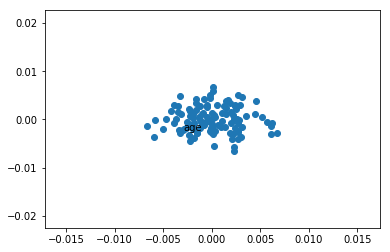

In [138]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
#for i, word in enumerate(words):
#		pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.annotate('age', xy=(result[51, 0], result[51, 1]))
pyplot.show()